In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/cleaned_reviews.tsv", sep="\t")
df.dropna(subset=["reviewText"], inplace=True)

In [4]:
# could use LogisticRegression classifier to map our numbers in the range [0,1]
# check accuracy and also youden's index
    # - use youden's index to get indication of our predictive power
# Compare how it performes with TF-IDF

split = 0.1


df["helpful"] = np.where(df.voteSuccess >= split, 1, 0)
df_helpful = df.loc[df.helpful == 1]
df_unhelpful = df.loc[df.helpful == 0]

df.dropna(subset=["reviewText"], inplace=True)
x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.helpful, test_size=0.25, random_state=30)

In [5]:
tm_vectorizer = CountVectorizer(stop_words="english")

term_matrix_train = tm_vectorizer.fit_transform(x_train)
term_matrix_test = tm_vectorizer.transform(x_test)

In [6]:
clf = LinearSVC(random_state=0, max_iter=10000)

clf.fit(term_matrix_train, y_train)
y_test_pred = clf.predict(term_matrix_test)


classification_report(y_test, y_test_pred, output_dict=True)

{'0': {'precision': 0.8744172055948263,
  'recall': 0.9426070038910506,
  'f1-score': 0.9072325817273933,
  'support': 12336},
 '1': {'precision': 0.4732142857142857,
  'recall': 0.27580225498699046,
  'f1-score': 0.3484931506849315,
  'support': 2306},
 'accuracy': 0.8375904931020353,
 'macro avg': {'precision': 0.6738157456545559,
  'recall': 0.6092046294390205,
  'f1-score': 0.6278628662061624,
  'support': 14642},
 'weighted avg': {'precision': 0.8112308968088322,
  'recall': 0.8375904931020353,
  'f1-score': 0.8192355097437901,
  'support': 14642}}

<Figure size 720x576 with 0 Axes>

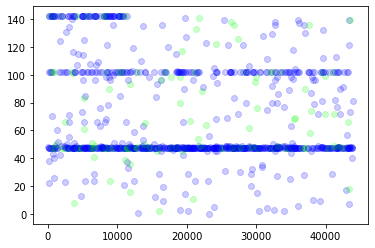

In [7]:
plt.figure(figsize=(10, 8))# Plotting our two-features-space
mtrx_dict = term_matrix_train.todok()
xy = list(mtrx_dict.keys())[:1000]

colors=["#0000FF", "#00FF00"]

fig = plt.figure()
ax = fig.add_subplot()

data = list(zip(xy, y_train[:1000]))

for i in range(len(data)):
    ax.scatter(x=data[i][0][0], y=data[i][0][1], color=colors[data[i][1]], alpha=0.2)
plt.show()